**1.📝 Introduction and Problem Statement**

In this task, the goal is to build a regression model that can estimate the **medical insurance claim amount (charges)** based on a person’s demographic and health information. This can help insurance companies better predict future claims and set premiums accordingly.


**2. Load Libraries and Upload Dataset**

In [1]:
# 📦 Load necessary libraries
import pandas as pd
import numpy as np
from google.colab import files

# 📁 Upload CSV file manually
uploaded = files.upload()  # Prompt user to upload 'insurance.csv'

# 📥 Read uploaded CSV into a DataFrame
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

# 🧾 View basic info about the dataset
print("🔍 Dataset Preview:")
display(df.head())

print("\n📋 Dataset Info:")
df.info()

print("\n📊 Statistical Summary:")
display(df.describe())


Saving insurance.csv to insurance.csv
🔍 Dataset Preview:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

📊 Statistical Summary:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**3. Data Cleaning and Preparation**

In [2]:
# Check for nulls
df.isnull().sum()

# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# View correlation
df_encoded.corr()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


**4. Exploratory Data Analysis (EDA)**

<Axes: title={'center': 'Age vs Charges'}, xlabel='bmi', ylabel='charges'>

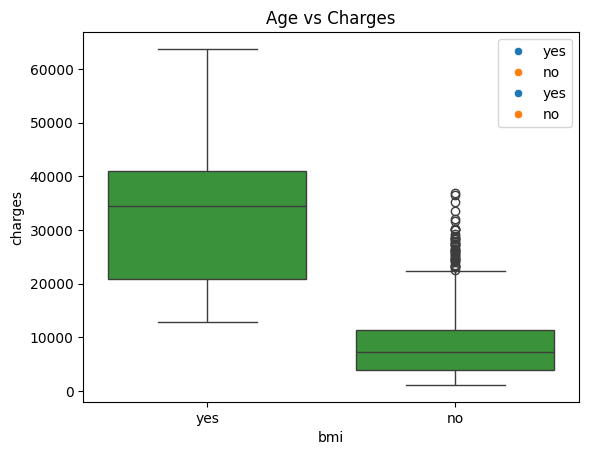

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Charges vs BMI
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title("BMI vs Charges")

# Charges vs Age
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title("Age vs Charges")

# Boxplot by smoker
sns.boxplot(x='smoker', y='charges', data=df)


**5. Model Training: Linear Regression**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


**6. Model Evaluation**

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 4181.19447375365
RMSE: 5796.284659276273


**7. Saving and Downloading model**

In [6]:
import joblib

# Save the model
joblib.dump(model, 'insurance_model.pkl')

# Download the model from Colab
from google.colab import files
files.download('insurance_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>